**Data Analytics**

**Problem Statement:**


Create an 'Academic performance' dataset of students and perform following operations using Python.
1. Scan all variables for missing values and consistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all the numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformation on atleast one of the varibales. The purpose of this transformation should be one of the following reasons to change the scale for better understanding of the variable, to convert a non-linear relation into a linera one, or to decrease the skewness and convert distribution into a normal distribution.

**Import all the required python libraries**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

**Load the dataset into pandas dataframe**


In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving Academic performance.csv to Academic performance.csv


{'Academic performance.csv': b'Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result\r\n1,sfdsf,73,29,77,2,181,45.25,pass\r\n2,hjg,53,,68,29,150,37.5,pass\r\n3,dg,99,21,41,-10,151,37.75,pass\r\n4,ge,,-100,37,68,5,1.25,fail\r\n5,sfdsf,91,45,80,,216,54,pass\r\n6,gshg,38,58,9,21,126,31.5,fail\r\n7,gtyfj,57,,1000,17,1074,268.5,pass\r\n8,,23,38,17,24,102,25.5,fail\r\n9,,60,83,71,11,225,56.25,pass\r\n10,gsg,,77,1,34,112,28,fail\r\n11,grsg,51,55,69,,175,43.75,pass\r\n12,,40,47,4,81,172,43,pass\r\n13,gs,500,58,34,8,600,150,pass\r\n14,,19,42,28,33,122,30.5,fail\r\n15,grsg,62,47,95,91,295,73.75,pass\r\n16,,,96,92,64,252,63,pass\r\n17,grsg,69,36,71,16,192,48,pass\r\n18,dghgh,19,82,92,2,195,48.75,pass\r\n19,gjg,63,0,61,12,136,34,fail\r\n20,gjhgjh,17,7,65,8,97,24.25,fail\r\n'}

In [ ]:
df=pd.read_csv("Academic performance.csv")

In [ ]:
df

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.0,29.0,77,2.0,181,45.25,pass
1,2,hjg,53.0,NaN,68,29.0,150,37.50,pass
2,3,dg,99.0,21.0,41,-10.0,151,37.75,pass
3,4,ge,NaN,-100.0,37,68.0,5,1.25,fail
4,5,sfdsf,91.0,45.0,80,NaN,216,54.00,pass
5,6,gshg,38.0,58.0,9,21.0,126,31.50,fail
6,7,gtyfj,57.0,NaN,1000,17.0,1074,268.50,pass
7,8,NaN,23.0,38.0,17,24.0,102,25.50,fail
8,9,NaN,60.0,83.0,71,11.0,225,56.25,pass
9,10,gsg,NaN,77.0,1,34.0,112,28.00,fail


**Data preprocessing:**

In [ ]:
df.head()

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.0,29.0,77,2.0,181,45.25,pass
1,2,hjg,53.0,NaN,68,29.0,150,37.50,pass
2,3,dg,99.0,21.0,41,-10.0,151,37.75,pass
3,4,ge,NaN,-100.0,37,68.0,5,1.25,fail
4,5,sfdsf,91.0,45.0,80,NaN,216,54.00,pass


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            20 non-null     int64  
 1   Student_name  15 non-null     object 
 2   subject1      17 non-null     float64
 3   subject2      18 non-null     float64
 4   subject3      20 non-null     int64  
 5   subject4      18 non-null     float64
 6   total         20 non-null     int64  
 7   percentage    20 non-null     float64
 8   result        20 non-null     object 
dtypes: float64(4), int64(3), object(2)
memory usage: 1.5+ KB


In [ ]:
df.describe(include="all")

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
count,20.00000,15,17.000000,18.000000,20.000000,18.000000,20.00000,20.000000,20
unique,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,grsg,NaN,NaN,NaN,NaN,NaN,NaN,pass
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,13
mean,10.50000,NaN,78.470588,40.055556,100.600000,28.388889,228.90000,57.225000,NaN
std,5.91608,NaN,111.284611,43.324320,213.820485,28.905808,230.35211,57.588028,NaN
min,1.00000,NaN,17.000000,-100.000000,1.000000,-10.000000,5.00000,1.250000,NaN
25%,5.75000,NaN,38.000000,30.750000,32.500000,8.750000,125.00000,31.250000,NaN
50%,10.50000,NaN,57.000000,46.000000,66.500000,19.000000,173.50000,43.375000,NaN
75%,15.25000,NaN,69.000000,58.000000,77.750000,33.750000,218.25000,54.562500,NaN


In [ ]:
df.shape

(20, 9)

In [ ]:
df.dtypes

Id                int64
Student_name     object
subject1        float64
subject2        float64
subject3          int64
subject4        float64
total             int64
percentage      float64
result           object
dtype: object

In [ ]:
df.columns

Index(['Id', 'Student_name', 'subject1', 'subject2', 'subject3', 'subject4',
       'total', 'percentage', 'result'],
      dtype='object')

In [ ]:
df[0:5]

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.0,29.0,77,2.0,181,45.25,pass
1,2,hjg,53.0,NaN,68,29.0,150,37.50,pass
2,3,dg,99.0,21.0,41,-10.0,151,37.75,pass
3,4,ge,NaN,-100.0,37,68.0,5,1.25,fail
4,5,sfdsf,91.0,45.0,80,NaN,216,54.00,pass


In [ ]:
df.loc[0:2]

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.0,29.0,77,2.0,181,45.25,pass
1,2,hjg,53.0,NaN,68,29.0,150,37.50,pass
2,3,dg,99.0,21.0,41,-10.0,151,37.75,pass


In [ ]:
df.loc[0:2,'subject1':'subject4']

,subject1,subject2,subject3,subject4
0,73.0,29.0,77,2.0
1,53.0,NaN,68,29.0
2,99.0,21.0,41,-10.0


In [ ]:
df.iloc[1:3]

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
1,2,hjg,53.0,NaN,68,29.0,150,37.50,pass
2,3,dg,99.0,21.0,41,-10.0,151,37.75,pass


In [ ]:
df.iloc[1:5,1:5]

,Student_name,subject1,subject2,subject3
1,hjg,53.0,NaN,68
2,dg,99.0,21.0,41
3,ge,NaN,-100.0,37
4,sfdsf,91.0,45.0,80


**Identification and handling of null values:**

In [ ]:
df.isnull()

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False


In [ ]:
df.isnull().any()

Id              False
Student_name     True
subject1         True
subject2         True
subject3        False
subject4         True
total           False
percentage      False
result          False
dtype: bool

In [ ]:
df.isnull().sum()

Id              0
Student_name    5
subject1        3
subject2        2
subject3        0
subject4        2
total           0
percentage      0
result          0
dtype: int64

In [ ]:
df.Student_name.isnull().sum()

5

Make a list of column having missing value

In [ ]:
cols_with_na=[]
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)
cols_with_na
    

['Student_name', 'subject1', 'subject2', 'subject4']

Filling missing values using dropna(),fillna(),replace():

---


1.replacing null values with NaN

In [ ]:
df.replace(np.nan,value=0)

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.0,29.0,77,2.0,181,45.25,pass
1,2,hjg,53.0,0.0,68,29.0,150,37.50,pass
2,3,dg,99.0,21.0,41,-10.0,151,37.75,pass
3,4,ge,0.0,-100.0,37,68.0,5,1.25,fail
4,5,sfdsf,91.0,45.0,80,0.0,216,54.00,pass
5,6,gshg,38.0,58.0,9,21.0,126,31.50,fail
6,7,gtyfj,57.0,0.0,1000,17.0,1074,268.50,pass
7,8,0,23.0,38.0,17,24.0,102,25.50,fail
8,9,0,60.0,83.0,71,11.0,225,56.25,pass
9,10,gsg,0.0,77.0,1,34.0,112,28.00,fail


2.Filling null values with fillna()

In [ ]:
df.fillna(1)

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.0,29.0,77,2.0,181,45.25,pass
1,2,hjg,53.0,1.0,68,29.0,150,37.50,pass
2,3,dg,99.0,21.0,41,-10.0,151,37.75,pass
3,4,ge,1.0,-100.0,37,68.0,5,1.25,fail
4,5,sfdsf,91.0,45.0,80,1.0,216,54.00,pass
5,6,gshg,38.0,58.0,9,21.0,126,31.50,fail
6,7,gtyfj,57.0,1.0,1000,17.0,1074,268.50,pass
7,8,1,23.0,38.0,17,24.0,102,25.50,fail
8,9,1,60.0,83.0,71,11.0,225,56.25,pass
9,10,gsg,1.0,77.0,1,34.0,112,28.00,fail


3.filling missing values using mean,median,max,min and standard deviation of that column

In [ ]:
df['subject1']=df['subject1'].fillna(df['subject1'].mean())

In [ ]:
df.head(10)

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.000000,29.0,77,2.0,181,45.25,pass
1,2,hjg,53.000000,NaN,68,29.0,150,37.50,pass
2,3,dg,99.000000,21.0,41,-10.0,151,37.75,pass
3,4,ge,78.470588,-100.0,37,68.0,5,1.25,fail
4,5,sfdsf,91.000000,45.0,80,NaN,216,54.00,pass
5,6,gshg,38.000000,58.0,9,21.0,126,31.50,fail
6,7,gtyfj,57.000000,NaN,1000,17.0,1074,268.50,pass
7,8,NaN,23.000000,38.0,17,24.0,102,25.50,fail
8,9,NaN,60.000000,83.0,71,11.0,225,56.25,pass
9,10,gsg,78.470588,77.0,1,34.0,112,28.00,fail


4. Deleting null values using dropna() method

In [ ]:
df.dropna()

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.000000,29.0,77,2.0,181,45.25,pass
2,3,dg,99.000000,21.0,41,-10.0,151,37.75,pass
3,4,ge,78.470588,-100.0,37,68.0,5,1.25,fail
5,6,gshg,38.000000,58.0,9,21.0,126,31.50,fail
9,10,gsg,78.470588,77.0,1,34.0,112,28.00,fail
12,13,gs,500.000000,58.0,34,8.0,600,150.00,pass
14,15,grsg,62.000000,47.0,95,91.0,295,73.75,pass
16,17,grsg,69.000000,36.0,71,16.0,192,48.00,pass
17,18,dghgh,19.000000,82.0,92,2.0,195,48.75,pass
18,19,gjg,63.000000,0.0,61,12.0,136,34.00,fail


In [ ]:
df.dropna(how="all")

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.000000,29.0,77,2.0,181,45.25,pass
1,2,hjg,53.000000,NaN,68,29.0,150,37.50,pass
2,3,dg,99.000000,21.0,41,-10.0,151,37.75,pass
3,4,ge,78.470588,-100.0,37,68.0,5,1.25,fail
4,5,sfdsf,91.000000,45.0,80,NaN,216,54.00,pass
5,6,gshg,38.000000,58.0,9,21.0,126,31.50,fail
6,7,gtyfj,57.000000,NaN,1000,17.0,1074,268.50,pass
7,8,NaN,23.000000,38.0,17,24.0,102,25.50,fail
8,9,NaN,60.000000,83.0,71,11.0,225,56.25,pass
9,10,gsg,78.470588,77.0,1,34.0,112,28.00,fail


In [ ]:
df.dropna(axis=1)

,Id,subject1,subject3,total,percentage,result
0,1,73.000000,77,181,45.25,pass
1,2,53.000000,68,150,37.50,pass
2,3,99.000000,41,151,37.75,pass
3,4,78.470588,37,5,1.25,fail
4,5,91.000000,80,216,54.00,pass
5,6,38.000000,9,126,31.50,fail
6,7,57.000000,1000,1074,268.50,pass
7,8,23.000000,17,102,25.50,fail
8,9,60.000000,71,225,56.25,pass
9,10,78.470588,1,112,28.00,fail


In [ ]:
df.dropna(axis=0,how='any',inplace=True)

In [ ]:
df

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
0,1,sfdsf,73.000000,29.0,77,2.0,181,45.25,pass
2,3,dg,99.000000,21.0,41,-10.0,151,37.75,pass
3,4,ge,78.470588,-100.0,37,68.0,5,1.25,fail
5,6,gshg,38.000000,58.0,9,21.0,126,31.50,fail
9,10,gsg,78.470588,77.0,1,34.0,112,28.00,fail
12,13,gs,500.000000,58.0,34,8.0,600,150.00,pass
14,15,grsg,62.000000,47.0,95,91.0,295,73.75,pass
16,17,grsg,69.000000,36.0,71,16.0,192,48.00,pass
17,18,dghgh,19.000000,82.0,92,2.0,195,48.75,pass
18,19,gjg,63.000000,0.0,61,12.0,136,34.00,fail


# Identification and handling of outliers

1.Detecting outliers using boxplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Academic performance.csv")

<Axes: >

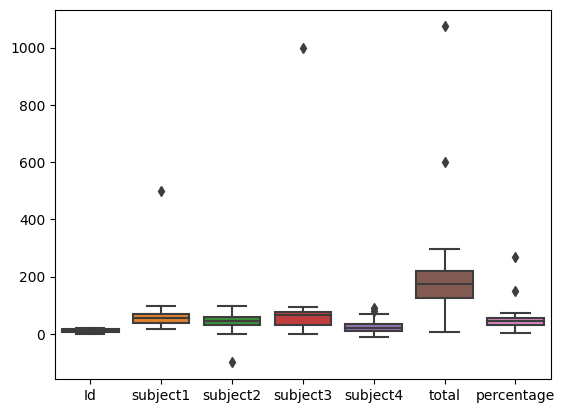

In [ ]:
sns.boxplot(df)

<Axes: >

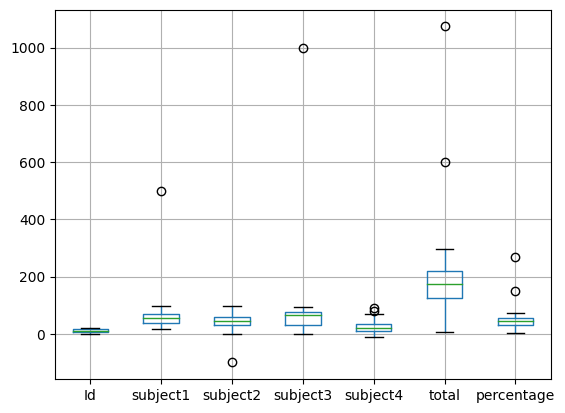

In [ ]:
df.boxplot()

<Axes: xlabel='total'>

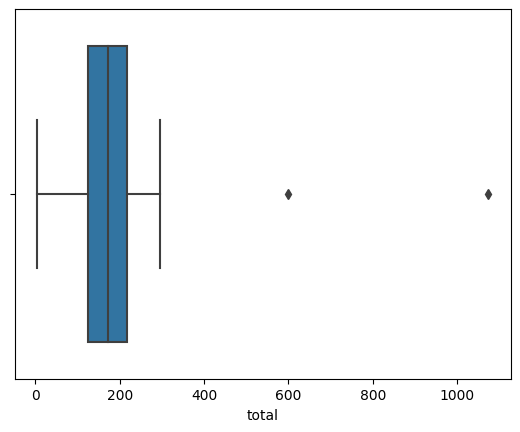

In [ ]:
sns.boxplot(x=df.total)

<Axes: xlabel='percentage'>

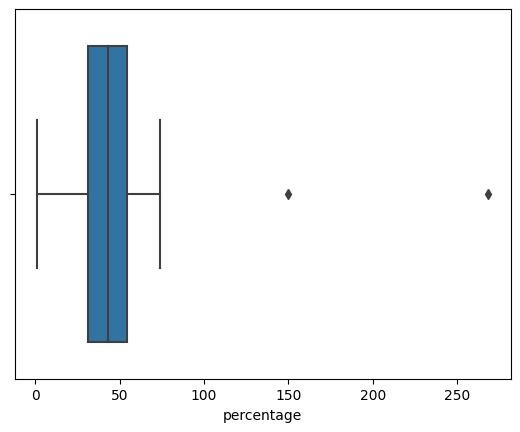

In [ ]:
sns.boxplot(x=df.percentage)

<Axes: xlabel='subject1'>

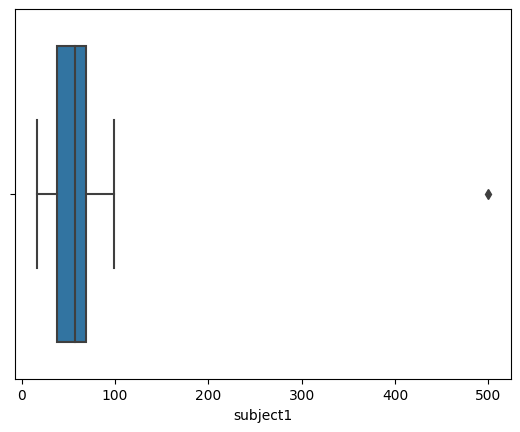

In [ ]:
sns.boxplot(x=df.subject1)

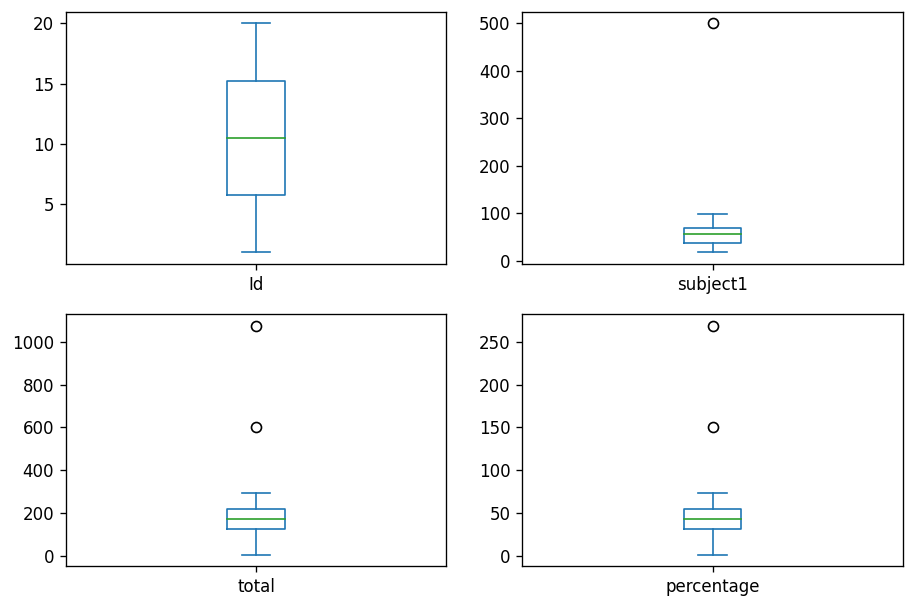

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(9,6)
df_list=['Id','subject1','total','percentage']
fig,axes=plt.subplots(2,2)
fig.set_dpi(120)

count=0
for r in range(2):
    for c in range(2):
        _=df[df_list[count]].plot(kind='box',ax=axes[r,c])
        count+=1

2. Detect outliers using Inter Quantile Range(IQR):


In [ ]:
Q1=df['percentage'].quantile(0.25)
Q3=df['percentage'].quantile(0.75)
IQR=Q3-Q1
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
print(f'Q1={Q1}, Q3={Q3}, IQR={IQR}, Lower_limit={Lower_limit}, Upper_limit={Upper_limit}')

Q1=31.25, Q3=54.5625, IQR=23.3125, Lower_limit=-3.71875, Upper_limit=89.53125


In [ ]:
df[(df['percentage']<Lower_limit)|(df['percentage']>Upper_limit)]

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result
6,7,gtyfj,57.0,NaN,1000,17.0,1074,268.5,pass
12,13,gs,500.0,58.0,34,8.0,600,150.0,pass


# Handling of outliers

1.removing the outlier

In [ ]:
outliers=[]
for i in df.percentage:
    if i<Lower_limit or i>Upper_limit:
        outliers.append(i)
print("outliers are",outliers)

outliers are [268.5, 150.0]


In [ ]:
Upper_limit

89.53125

In [ ]:
Lower_limit

-3.71875

*Lower_limit*

In [ ]:
df1=df[df.percentage<Lower_limit].index

In [ ]:
df1=df.drop(df[df.percentage<Lower_limit].index)

In [ ]:
df1.shape

(20, 9)

In [ ]:
df2=df[df.percentage<Lower_limit]
df2

,Id,Student_name,subject1,subject2,subject3,subject4,total,percentage,result


2.Mean/ Median imputation

<Axes: xlabel='percentage', ylabel='Density'>

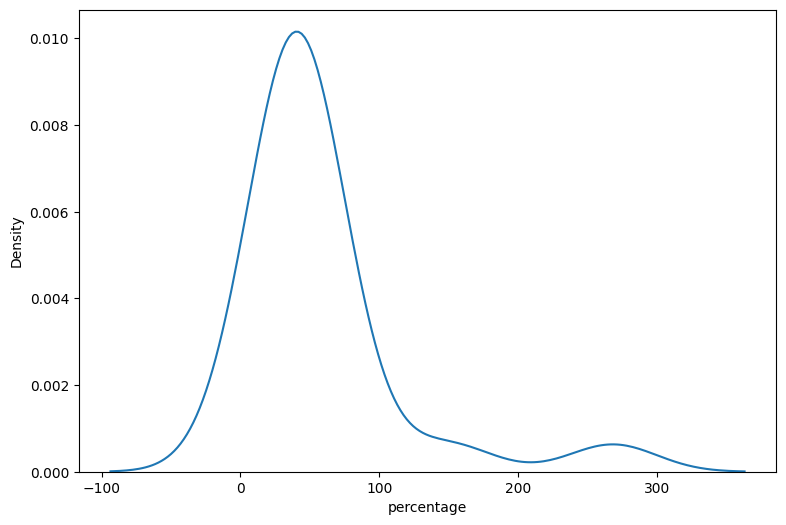

In [ ]:
sns.kdeplot(df.percentage)

<Axes: xlabel='percentage', ylabel='Density'>

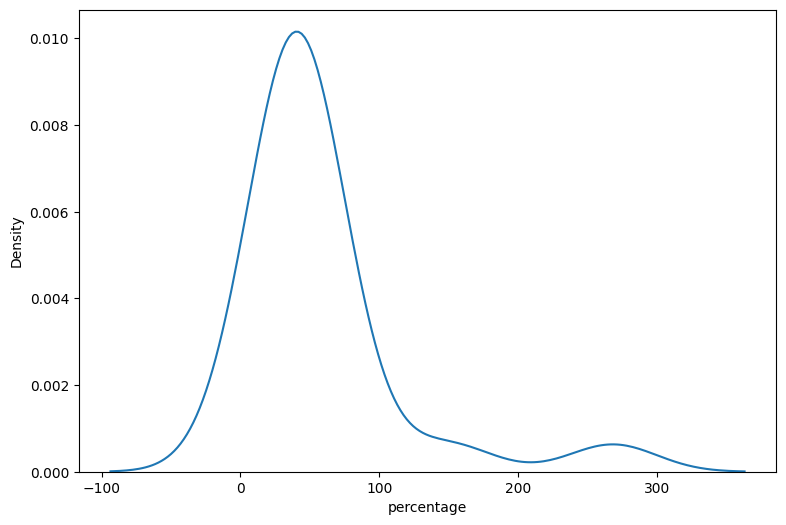

In [ ]:
sns.kdeplot(df1.percentage)

In [ ]:
df.percentage

0      45.25
1      37.50
2      37.75
3       1.25
4      54.00
5      31.50
6     268.50
7      25.50
8      56.25
9      28.00
10     43.75
11     43.00
12    150.00
13     30.50
14     73.75
15     63.00
16     48.00
17     48.75
18     34.00
19     24.25
Name: percentage, dtype: float64

In [ ]:
log_percentage=np.log(df.percentage)
log_percentage

0     3.812203
1     3.624341
2     3.630985
3     0.223144
4     3.988984
5     3.449988
6     5.592851
7     3.238678
8     4.029806
9     3.332205
10    3.778492
11    3.761200
12    5.010635
13    3.417727
14    4.300681
15    4.143135
16    3.871201
17    3.886705
18    3.526361
19    3.188417
Name: percentage, dtype: float64

<Axes: xlabel='percentage', ylabel='Density'>

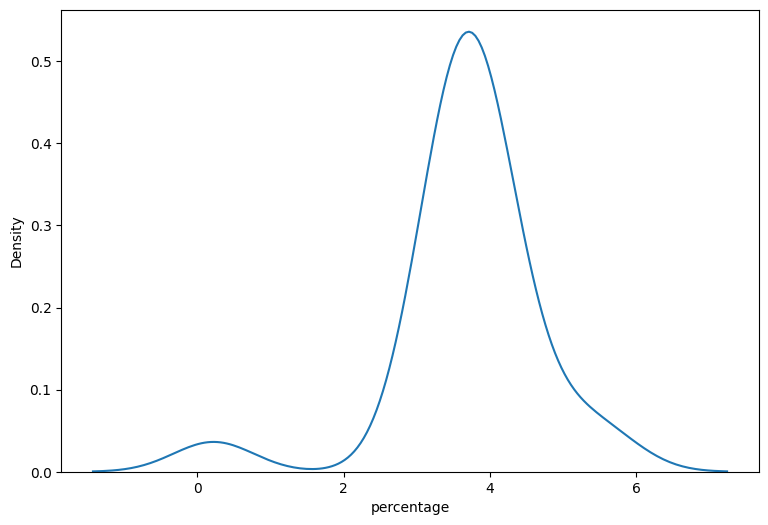

In [ ]:
sns.kdeplot(log_percentage)

# Data transformation

1. Checking the distribution with skewness

In [ ]:
import seaborn as sns

In [ ]:
df.skew()

<ipython-input-62-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Id            0.000000
subject1      3.798266
subject2     -2.003366
subject3      4.324513
subject4      1.027084
total         3.029450
percentage    3.029450
dtype: float64

checking the distribution of variables using KDE plot


<Axes: xlabel='Id', ylabel='Density'>

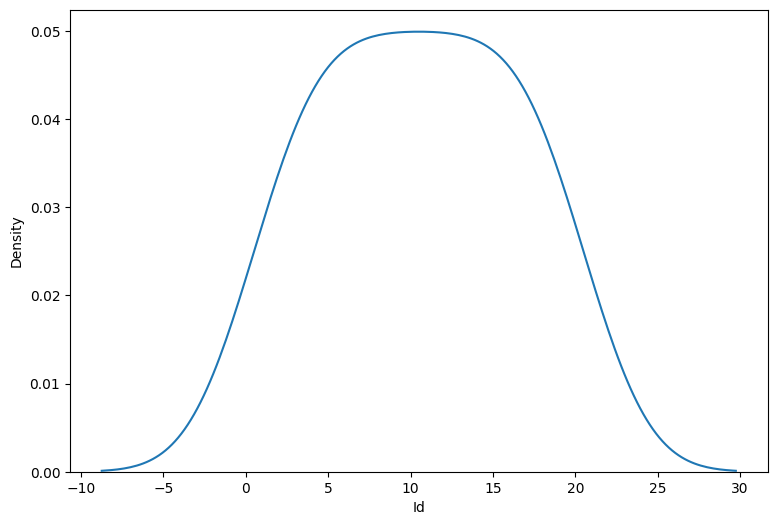

In [ ]:
sns.kdeplot(df.Id)

<Axes: xlabel='subject1', ylabel='Density'>

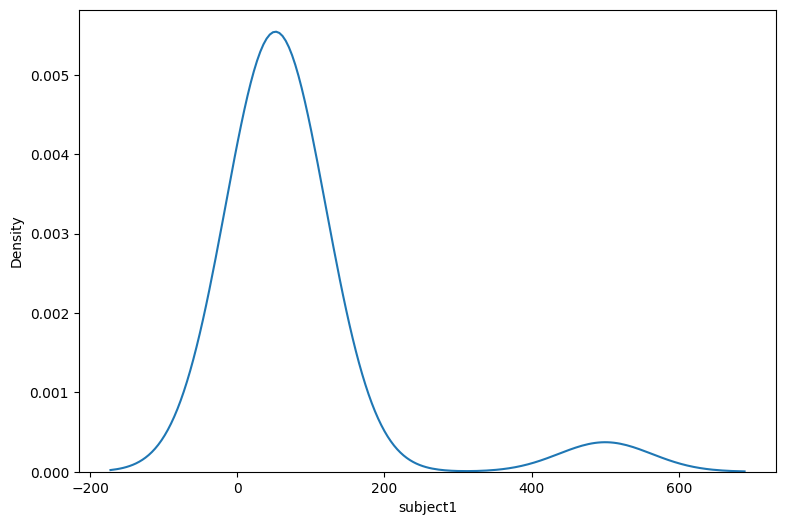

In [ ]:
sns.kdeplot(df.subject1)

<Axes: xlabel='subject2', ylabel='Density'>

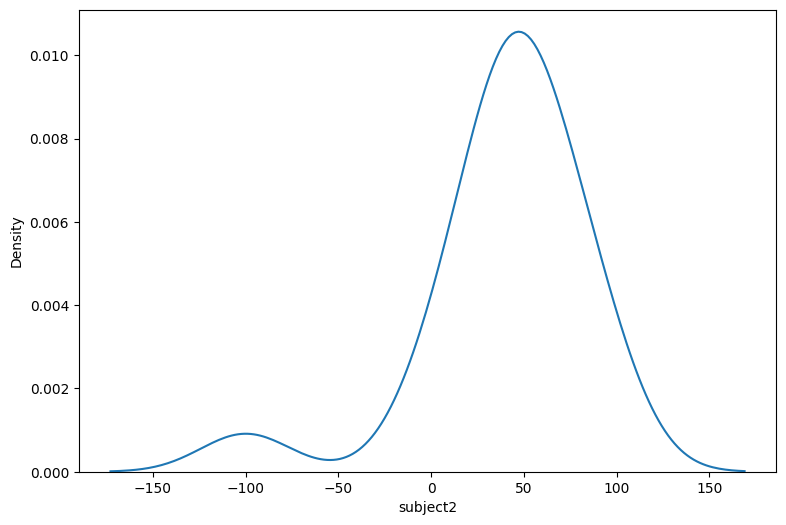

In [ ]:
sns.kdeplot(df.subject2)

<Axes: xlabel='subject3', ylabel='Density'>

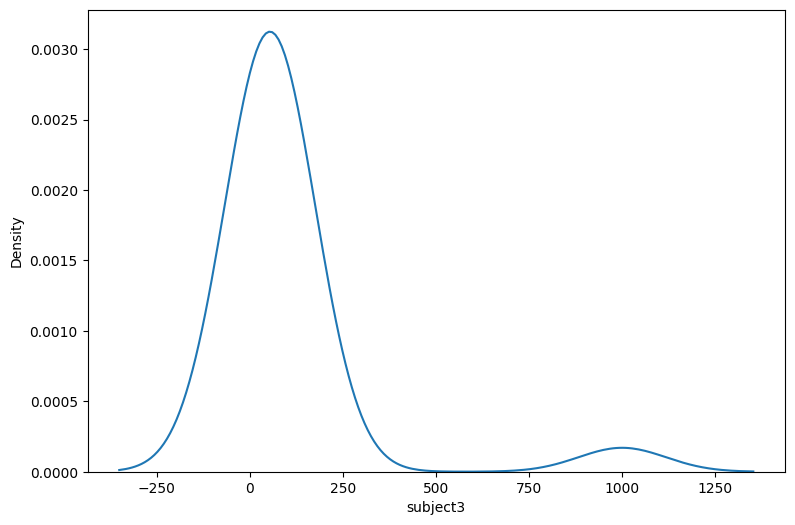

In [ ]:
sns.kdeplot(df.subject3)

<Axes: xlabel='subject4', ylabel='Density'>

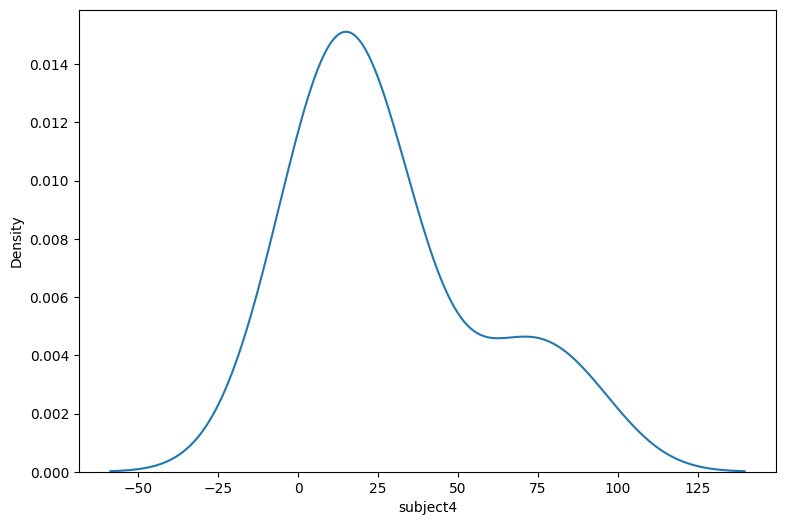

In [ ]:
sns.kdeplot(df.subject4)

<Axes: xlabel='total', ylabel='Density'>

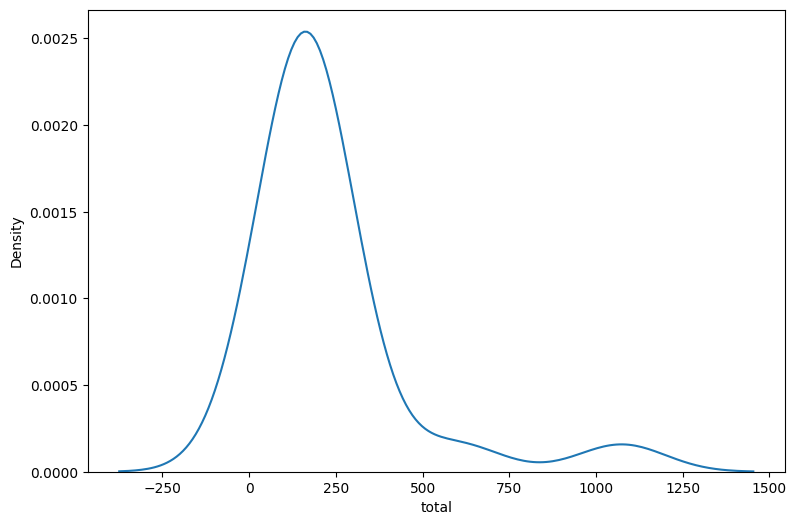

In [ ]:
sns.kdeplot(df.total)

<Axes: xlabel='percentage', ylabel='Density'>

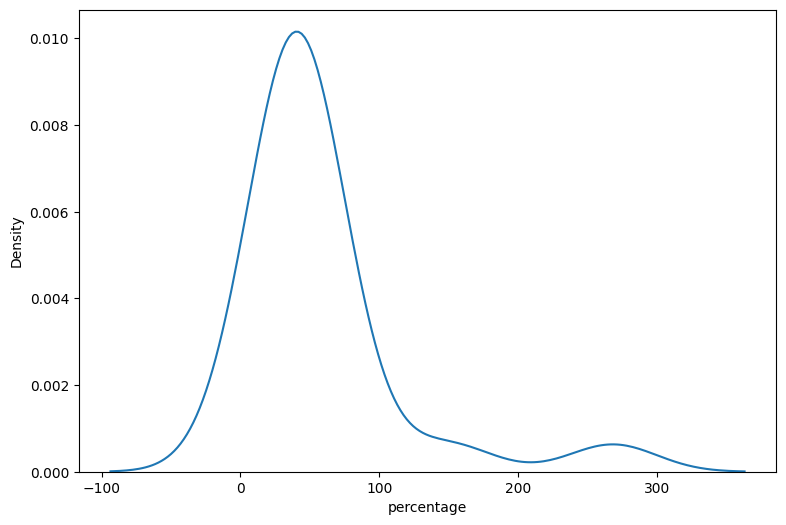

In [ ]:
sns.kdeplot(df.percentage)